## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)
- [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
- [Feature Transformation (Open in incognito mode)](https://towardsdatascience.com/feature-transformation-for-data-scientists-3a9eed562752)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv('X_final.csv')
y = pd.read_csv('y_final.csv')

## `RFE`

In [3]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [4]:
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)

In [5]:
selector = selector.fit(X, y)

In [6]:
selector.support_

array([False,  True,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
        True])

In [7]:
selector.ranking_

array([ 2,  1,  1,  5,  6,  1,  4,  7,  1,  3,  9,  1,  1,  8,  1,  1,  1,
       10,  1])

In [8]:
X.columns

Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
      dtype='object')

In [9]:
X = X[['Reco_Insurance_Type',
       'Lower_Age', 'Is_Spouse',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8' ]]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [11]:
cal_vif(X)

,var,VIF
0,Reco_Insurance_Type,37.11
5,X1,20.32
6,X2,8.83
7,X3,6.02
2,Is_Spouse,5.55
8,X4,5.32
4,Reco_Policy_Premium,4.08
1,Lower_Age,2.90
9,X5,2.53
10,X6,1.91


In [12]:
X.drop('Reco_Insurance_Type',axis=1,inplace=True)

In [13]:
cal_vif(X)

,var,VIF
3,Reco_Policy_Premium,2.51
0,Lower_Age,1.96
1,Is_Spouse,1.83
4,X1,1.12
5,X2,1.07
7,X4,1.04
6,X3,1.03
8,X5,1.03
9,X6,1.01
2,Reco_Policy_Cat,1.00


### `Good to go`

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## `Logistic Regression`

#### `Train Data`

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.5467662973460449
Precision => 0.5423728813559322
F-1 score => 0.5986767054528862
Confusion matrix =>
 [[ 810 1107]
 [ 652 1312]]
Recall score 0.6680244399185336


#### `Test Data`

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.49536560247167866
Precision => 0.4769736842105263
F-1 score => 0.5420560747663552
Confusion matrix =>
 [[191 318]
 [172 290]]
Recall score 0.6277056277056277


In [19]:
y_pred_proba_logistic = lr.predict_proba(X_test)
y_pred_proba_logistic

array([[0.42995656, 0.57004344],
       [0.69526381, 0.30473619],
       [0.41786276, 0.58213724],
       ...,
       [0.63557125, 0.36442875],
       [0.41610613, 0.58389387],
       [0.41659271, 0.58340729]])

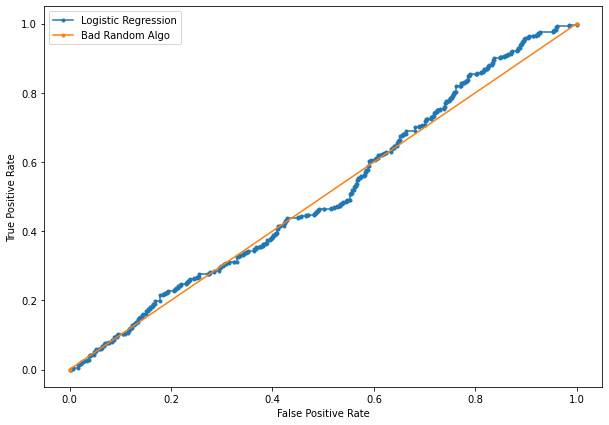

Logistic Regression AUC is => 0.5090152153020523


In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba_logistic[:,1]
lr_auc = roc_auc_score(y_test,lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds = roc_curve(y_test,lr_prob)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Logistic Regression AUC is => {lr_auc}')

## `SVC`

#### `Train Data`

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.5797474877608864
Precision => 0.5552605376700962
F-1 score => 0.6722925457102672
Confusion matrix =>
 [[ 577 1340]
 [ 291 1673]]
Recall score 0.8518329938900203


#### `Test Data`

In [23]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [24]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.505664263645726
Precision => 0.48770491803278687
F-1 score => 0.5979899497487438
Confusion matrix =>
 [[134 375]
 [105 357]]
Recall score 0.7727272727272727


In [25]:
y_pred_proba_svc = svc.predict_proba(X_test)
y_pred_proba_svc

array([[0.44245801, 0.55754199],
       [0.61845102, 0.38154898],
       [0.45021133, 0.54978867],
       ...,
       [0.62157991, 0.37842009],
       [0.43358667, 0.56641333],
       [0.44789816, 0.55210184]])

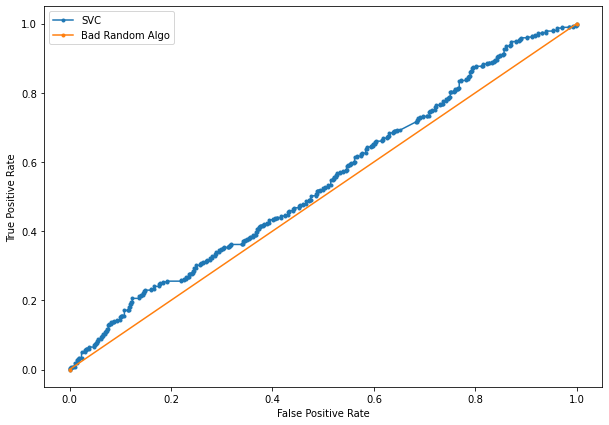

SVC AUC is => 0.5414147084088146


In [26]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

svc_prob = y_pred_proba_svc[:,1]
svc_auc = roc_auc_score(y_test,svc_prob)   # logistic regression
svc_fpr,svc_tpr,thesholds = roc_curve(y_test,svc_prob)
plt.plot(svc_fpr,svc_tpr,marker='.',label='SVC')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'SVC AUC is => {svc_auc}')

## `KNN`

#### `Train Data`

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.7075496006183973
Precision => 0.7063215530114485
F-1 score => 0.7143216712811477
Confusion matrix =>
 [[1327  590]
 [ 545 1419]]
Recall score 0.7225050916496945


#### `Test Data`

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [30]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.533470648815654
Precision => 0.50920245398773
F-1 score => 0.5236593059936907
Confusion matrix =>
 [[269 240]
 [213 249]]
Recall score 0.538961038961039


In [31]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       ...,
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6]])

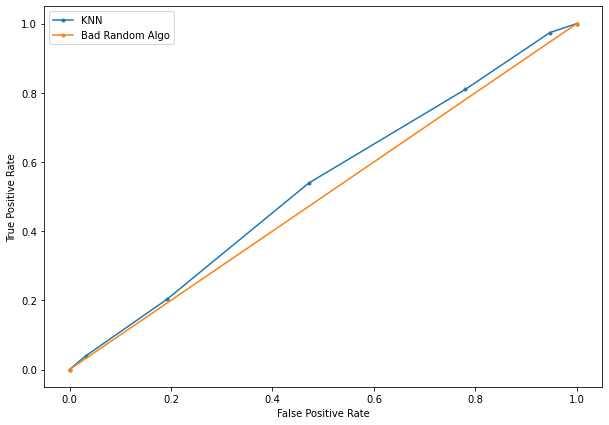

KNN AUC is => 0.532945934222948


In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

knn_prob = y_pred_proba_knn[:,1]
knn_auc = roc_auc_score(y_test,knn_prob)   # logistic regression
knn_fpr,knn_tpr,thesholds = roc_curve(y_test,knn_prob)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'KNN AUC is => {knn_auc}')

## `Decision Tree`

#### `Train Data`

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 1.0
Precision => 1.0
F-1 score => 1.0
Confusion matrix =>
 [[1917    0]
 [   0 1964]]
Recall score 1.0


#### `Test Data`

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_test)

In [36]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5211122554067971
Precision => 0.49709864603481624
F-1 score => 0.5250255362614912
Confusion matrix =>
 [[249 260]
 [205 257]]
Recall score 0.5562770562770563


In [37]:
y_pred_proba_dtree = dtrc.predict_proba(X_test)
y_pred_proba_dtree

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

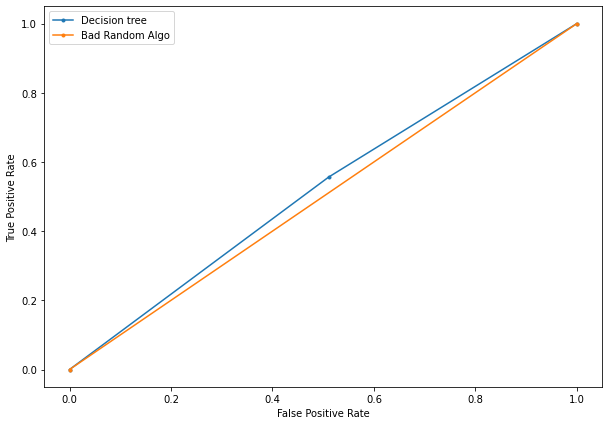

Decision Tree AUC is => 0.522735777647369


In [38]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

dtree_prob = y_pred_proba_dtree[:,1]
dtree_auc = roc_auc_score(y_test,dtree_prob)   # logistic regression
dtree_fpr,dtree_tpr,thesholds = roc_curve(y_test,dtree_prob)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {dtree_auc}')

## `Rndom Forest`

#### `Train Data`

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_train)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.999742334449884
Precision => 0.9994910941475827
F-1 score => 0.9997454823110207
Confusion matrix =>
 [[1916    1]
 [   0 1964]]
Recall score 1.0


#### `Test Data`

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [42]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5355303810504635
Precision => 0.511482254697286
F-1 score => 0.5207226354941552
Confusion matrix =>
 [[275 234]
 [217 245]]
Recall score 0.5303030303030303


In [43]:
y_pred_proba_rfc = rfc.predict_proba(X_test)
y_pred_proba_rfc

array([[0.17, 0.83],
       [0.92, 0.08],
       [0.25, 0.75],
       ...,
       [0.64, 0.36],
       [0.2 , 0.8 ],
       [0.65, 0.35]])

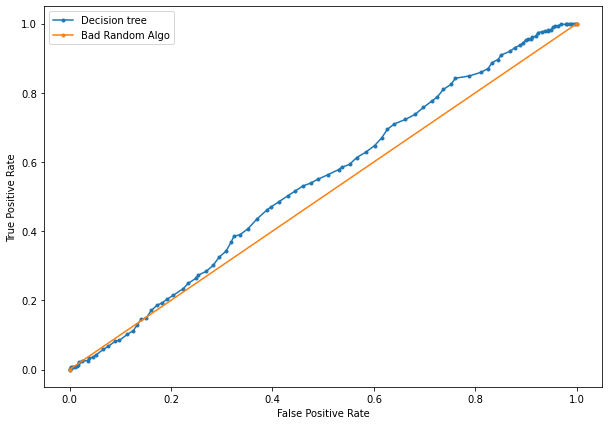

Decision Tree AUC is => 0.5395861505881152


In [44]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

rfc_prob = y_pred_proba_rfc[:,1]
rfc_auc = roc_auc_score(y_test,rfc_prob)   # logistic regression
rfc_fpr,rfc_tpr,thesholds = roc_curve(y_test,rfc_prob)
plt.plot(rfc_fpr,rfc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {rfc_auc}')

## `GBT`

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6578201494460191
Precision => 0.6385017421602788
F-1 score => 0.6882629107981221
Confusion matrix =>
 [[1087  830]
 [ 498 1466]]
Recall score 0.7464358452138493


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [48]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5437693099897013
Precision => 0.5173674588665448
F-1 score => 0.5609514370664023
Confusion matrix =>
 [[245 264]
 [179 283]]
Recall score 0.6125541125541125


In [49]:
y_pred_proba_gbc = gbc.predict_proba(X_test)
y_pred_proba_gbc

array([[0.50023441, 0.49976559],
       [0.96944831, 0.03055169],
       [0.40251407, 0.59748593],
       ...,
       [0.74451264, 0.25548736],
       [0.30723391, 0.69276609],
       [0.41977594, 0.58022406]])

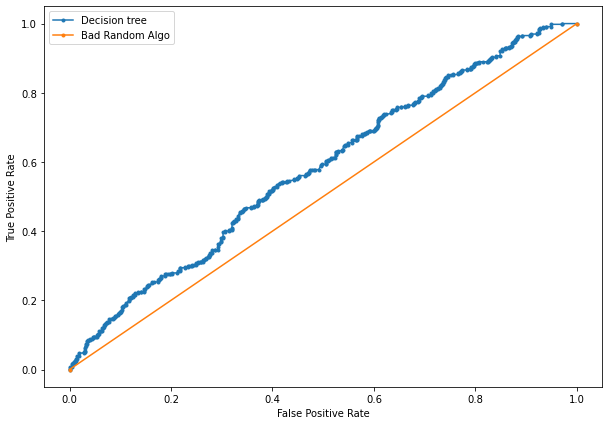

Decision Tree AUC is => 0.5800950850066764


In [50]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

gbc_prob = y_pred_proba_gbc[:,1]
gbc_auc = roc_auc_score(y_test,gbc_prob)   # logistic regression
gbc_fpr,gbc_tpr,thesholds = roc_curve(y_test,gbc_prob)
plt.plot(gbc_fpr,gbc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {gbc_auc}')

## `Ada Boost`

#### `Train Data`

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_train)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6137593403761917
Precision => 0.6008676789587852
F-1 score => 0.6488639025532912
Confusion matrix =>
 [[ 997  920]
 [ 579 1385]]
Recall score 0.705193482688391


#### `Test Data`

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [54]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5509783728115345
Precision => 0.524074074074074
F-1 score => 0.5648702594810379
Confusion matrix =>
 [[252 257]
 [179 283]]
Recall score 0.6125541125541125


In [55]:
y_pred_proba_abc = abc.predict_proba(X_test)
y_pred_proba_abc

array([[0.5002046 , 0.4997954 ],
       [0.52276145, 0.47723855],
       [0.49786312, 0.50213688],
       ...,
       [0.5539228 , 0.4460772 ],
       [0.49792213, 0.50207787],
       [0.49786312, 0.50213688]])

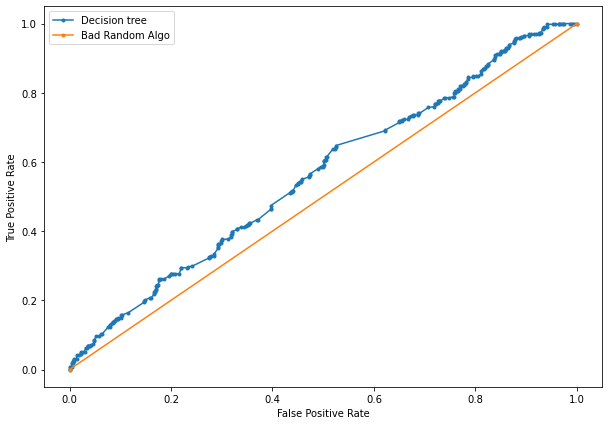

Decision Tree AUC is => 0.5617478461289857


In [56]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

abc_prob = y_pred_proba_abc[:,1]
abc_auc = roc_auc_score(y_test,abc_prob)   # logistic regression
abc_fpr,abc_tpr,thesholds = roc_curve(y_test,abc_prob)
plt.plot(abc_fpr,abc_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'Decision Tree AUC is => {abc_auc}')

### `GBT is working best after Feature Selection and Feature Transformation` 

## `END of Task5 -----------------------------------------`